<a href="https://colab.research.google.com/github/joanby/trading-algoritmico-a-z-con-python/blob/main/ES_TA_Cap%C3%ADtulo_08_Regresi%C3%B3n_Lineal_para_predecir_los_precios_de_las_acciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px">
<img alt="Colaboratory logo" height="45px" src="https://static-881c.kxcdn.com/wp-content/uploads/2016/03/frogamesLogoFull4.png" align="left" hspace="10px" vspace="0px"></p>


# Regresión Lineal para predecir los precios de las acciones

</br>

En este capítulo, explicaremos cómo funciona teóricamente la regresión lineal. A continuación, aplicaremos este algoritmo para predecir el precio de las acciones y crear una estrategia de trading

### Resumen
* Cómo funciona teóricamente un algoritmo de Regresión Lineal
* Predecir el precio de las acciones utilizando una regresión lineal
* Crear una estrategia de trading 

</br>

💰 Únete a la comunidad de [Discord](https://discord.gg/wXjNPAc5BH)

📚 Puedes leer nuestro libro en [Amazon](https://www.amazon.com/gp/product/B09HG18CYL)

🖥️ El canal de [YouTube de Quantreo's](https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw) (en inglés) y el de [Frogames](https://www.youtube.com/channel/UCMUxXNYrVCv6-bQakhomvBg) en español




In [1]:
! pip install yfinance
! pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 9.9 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel f

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import ta

In [3]:
import matplotlib as mpl
from matplotlib import cycler

colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rc('figure', facecolor='#313233')

# Cómo funciona teóricamente un algoritmo de Regresión Lineal
Mira el vídeo y el PDF adjunto.

# Predecir el precio de las acciones utilizando una regresión lineal


### Importar los datos de Yahoo (esiest choice)

**IMPORTANTE**: Puedes importar los datos desde Yahoo o desde MT5. Pero necesitas tener un dispositivo Windows para usar MT5. ¡Para evitar este problema, puedes ver el vídeo de introducción del capítulo MetaTrader 5 Live Trading! 

In [4]:
# Importar los datos
df = yf.download("GOOG")

# Nos quedamos con el cierre ajustado
df = df[["Adj Close"]]

# Renombra la columna
df.columns = ["close"]
df

[*********************100%***********************]  1 of 1 completed


,close
Date,
2004-08-19,49.982655
2004-08-20,53.952770
2004-08-23,54.495735
2004-08-24,52.239197
2004-08-25,52.802086
...,...
2022-06-14,2143.879883
2022-06-15,2207.810059
2022-06-16,2132.719971


### Ingeniería de Características



In [5]:
def feature_engineering(df):
    """ Crear nuevas variables"""
    
    # Copiamos el dataframe para evitar interferencias en los datos
    df_copy = df.dropna().copy()
    
    # Crear el retorno
    df_copy["returns"] = df_copy["close"].pct_change(1)

    # Crear las SMAs
    df_copy["SMA 15"] = df_copy[["close"]].rolling(15).mean().shift(1)
    df_copy["SMA 60"] = df_copy[["close"]].rolling(60).mean().shift(1)
    
    # Crear las volatilidades
    df_copy["MSD 10"] = df_copy[["returns"]].rolling(10).std().shift(1)
    df_copy["MSD 30"] = df_copy[["returns"]].rolling(30).std().shift(1)
    
    # Crear el RSI
    RSI = ta.momentum.RSIIndicator(df_copy["close"], window= 14, fillna = False)
    df_copy["rsi"] = RSI.rsi()
    
    return df_copy.dropna()

In [6]:
dfc = feature_engineering(df)
dfc

,close,returns,SMA 15,SMA 60,MSD 10,MSD 30,rsi
Date,,,,,,,
2004-11-12,90.660187,-0.005573,91.001902,67.843456,0.045158,0.045223,60.962971
2004-11-15,92.089828,0.015769,91.319711,68.521415,0.045046,0.045295,62.484309
2004-11-16,85.947845,-0.066696,91.235693,69.157033,0.044225,0.045283,52.938988
2004-11-17,85.927917,-0.000232,90.928179,69.681234,0.048354,0.047390,52.910746
2004-11-18,83.457184,-0.028754,90.480856,70.242713,0.048425,0.047302,49.392430
...,...,...,...,...,...,...,...
2022-06-14,2143.879883,0.002971,2252.950684,2463.279838,0.023643,0.025323,37.977281
2022-06-15,2207.810059,0.029820,2246.987337,2453.410669,0.023166,0.025028,43.980304
2022-06-16,2132.719971,-0.034011,2252.940007,2444.714669,0.025773,0.025653,39.183187


### Crear diferentes conjuntos de datos

In [7]:
dfc.columns

Index(['close', 'returns', 'SMA 15', 'SMA 60', 'MSD 10', 'MSD 30', 'rsi'], dtype='object')

In [8]:
# Porcentaje del conjunto de entrenamiento
split = int(0.80*len(dfc))

# Crear el conjunto de entrenamiento
X_train = dfc[['SMA 15', 'SMA 60', 'MSD 10', 'MSD 30', 'rsi']].iloc[:split]
y_train = dfc[["returns"]].iloc[:split]


# Crear el conjunto de testing
X_test = dfc[['SMA 15', 'SMA 60', 'MSD 10', 'MSD 30', 'rsi']].iloc[split:]
y_test = dfc[["returns"]].iloc[split:]

### Entrenamiento de regresión lineal

In [12]:
# Import la clase
from sklearn.linear_model import LinearRegression

# Inicializar la clase
reg = LinearRegression()

# Ajustar el modelo
reg.fit(X_train, y_train)

LinearRegression()

### Predicciones de regresión lineal

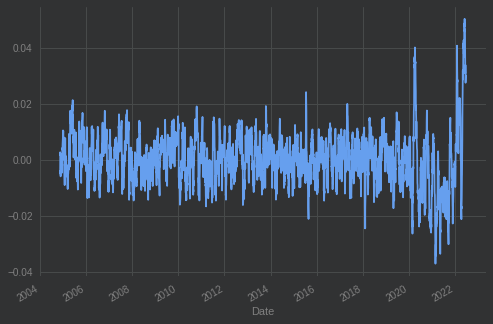

In [15]:
# Crear predicciones para todo el conjunto de datos
X = np.concatenate((X_train, X_test), axis=0)

dfc["prediction"] = reg.predict(X)

# Verificamos que el algoritmo no predice de un sólo modo (positiva o negativa)
dfc["prediction"].plot()

### Calcular el beneficio 

In [16]:
# Calculamos la posición
dfc["position"] = np.sign(dfc["prediction"])


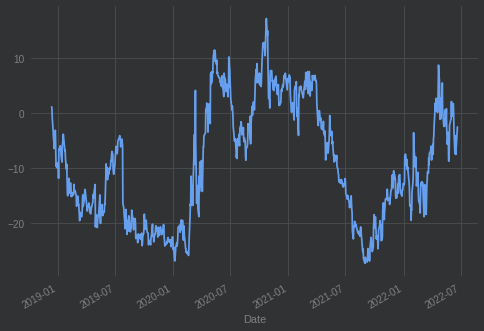

In [20]:
# Calcular el beneficio 
dfc["strategy"] = dfc["returns"] * dfc["position"].shift(1)


(dfc["strategy"].iloc[split:].cumsum()*100).plot()

In [21]:
def lin_reg_trading(symbol):

  def feature_engineering(df):
    """ Create new variables"""
    
    # Copiamos el marco de datos para evitar interferencias en los datos
    df_copy = df.dropna().copy()
    
    # Calcular el retorno
    df_copy["returns"] = df_copy["close"].pct_change(1)

    # Crear las SMAs
    df_copy["SMA 15"] = df_copy[["close"]].rolling(15).mean().shift(1)
    df_copy["SMA 60"] = df_copy[["close"]].rolling(60).mean().shift(1)
    
    # Crear las volatilidades
    df_copy["MSD 10"] = df_copy[["returns"]].rolling(10).std().shift(1)
    df_copy["MSD 30"] = df_copy[["returns"]].rolling(30).std().shift(1)
    
    # Crear las RSI
    RSI = ta.momentum.RSIIndicator(df_copy["close"], window= 14, fillna = False)
    df_copy["rsi"] = RSI.rsi()
    
    return df_copy.dropna()
  

  # Importar los datos
  df = yf.download(symbol)

  # Take adjusted close
  df = df[["Adj Close"]]

  # Rename the column
  df.columns = ["close"]

  dfc = feature_engineering(df)

  # Percentage train set
  split = int(0.80*len(dfc))

  # Train set creation
  X_train = dfc[['SMA 15', 'SMA 60', 'MSD 10', 'MSD 30', 'rsi']].iloc[:split]
  y_train = dfc[["returns"]].iloc[:split]


  # Test set creation
  X_test = dfc[['SMA 15', 'SMA 60', 'MSD 10', 'MSD 30', 'rsi']].iloc[split:]
  y_test = dfc[["returns"]].iloc[split:]

  # Import the class
  from sklearn.linear_model import LinearRegression

  # Initialize the class
  reg = LinearRegression()

  # Fit the model
  reg.fit(X_train, y_train)

  # Create predictions for the whole dataset
  X = np.concatenate((X_train, X_test), axis=0)

  dfc["prediction"] = reg.predict(X)

  # Compute the position
  dfc["position"] = np.sign(dfc["prediction"])

  # Compute the returns
  dfc["strategy"] = dfc["returns"] * dfc["position"].shift(1)


  (dfc["strategy"].iloc[split:].cumsum()*100).plot()

[*********************100%***********************]  1 of 1 completed


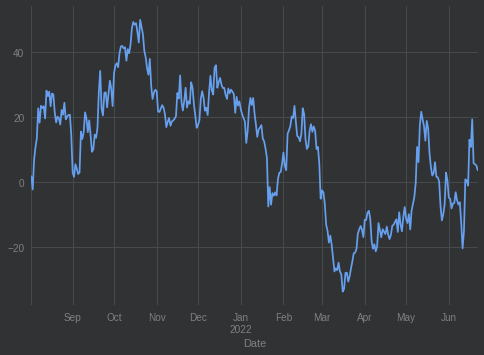

In [24]:
lin_reg_trading("ETH-EUR")